In [ ]:
# ------------------------------------------------------------
# RED WINE QUALITY — EXPLORATORY DATA ANALYSIS (EDA)
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import zscore

In [ ]:
# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("winequality-red.csv")   # make sure the file is in your folder

# Show first rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'

In [ ]:
# Means
mean_values = df.mean(numeric_only=True)
print("MEAN VALUES:\n", mean_values)

# Standard deviations
std_values = df.std(numeric_only=True)
print("\nSTANDARD DEVIATIONS:\n", std_values)

MEAN VALUES:
 fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

STANDARD DEVIATIONS:
 fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64


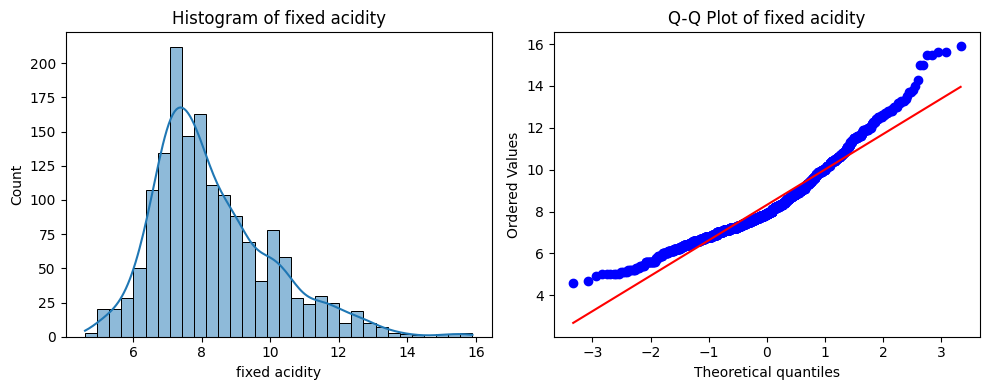

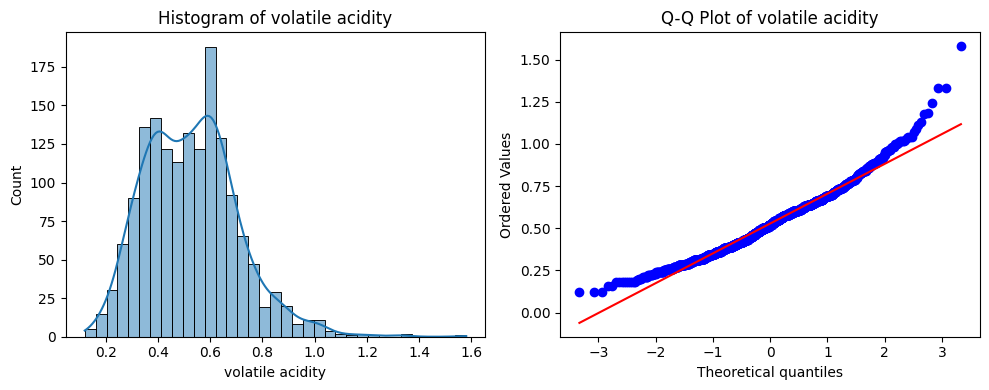

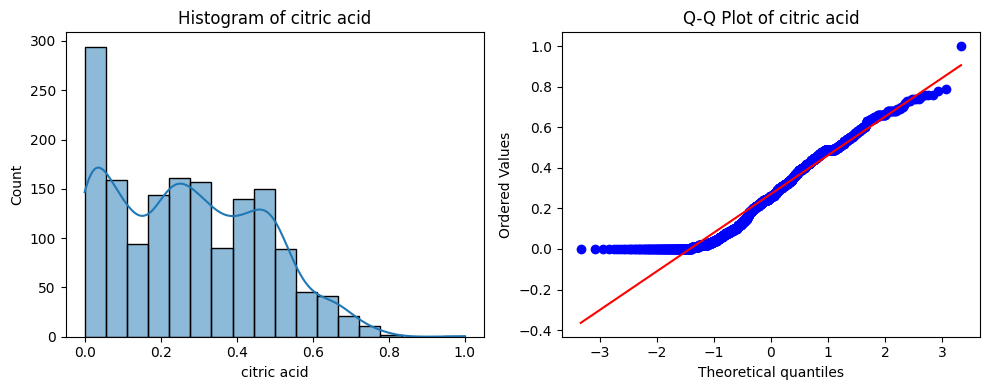

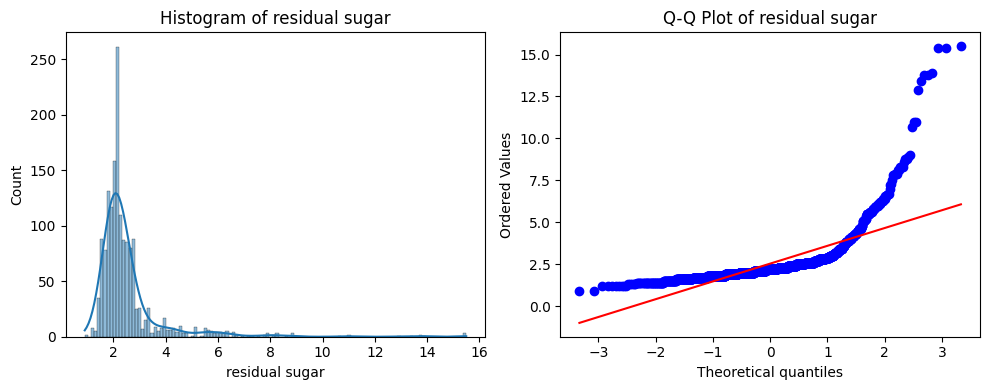

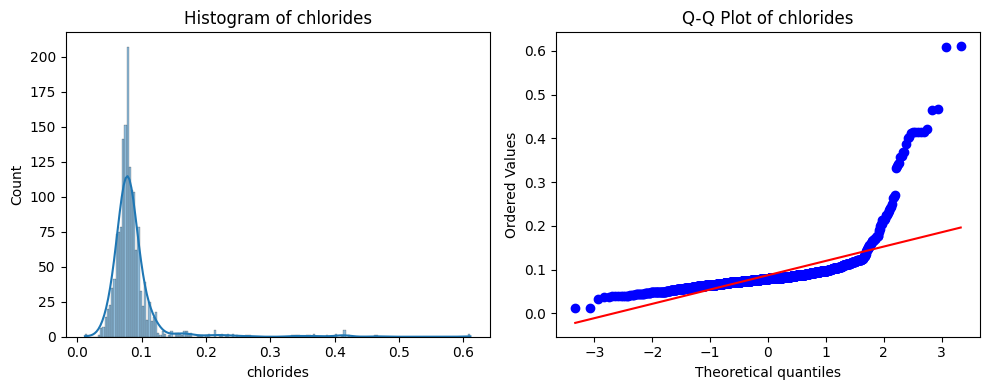

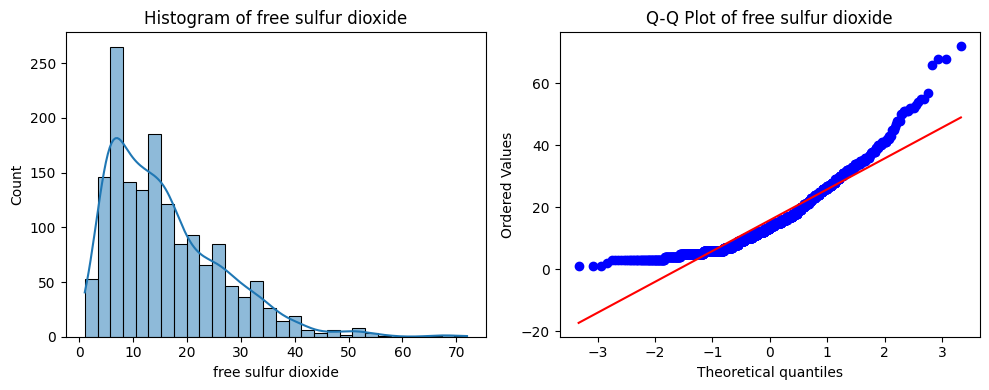

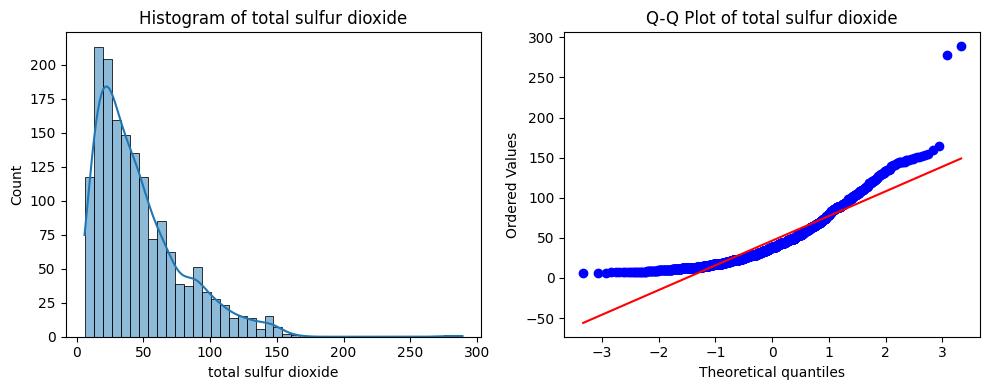

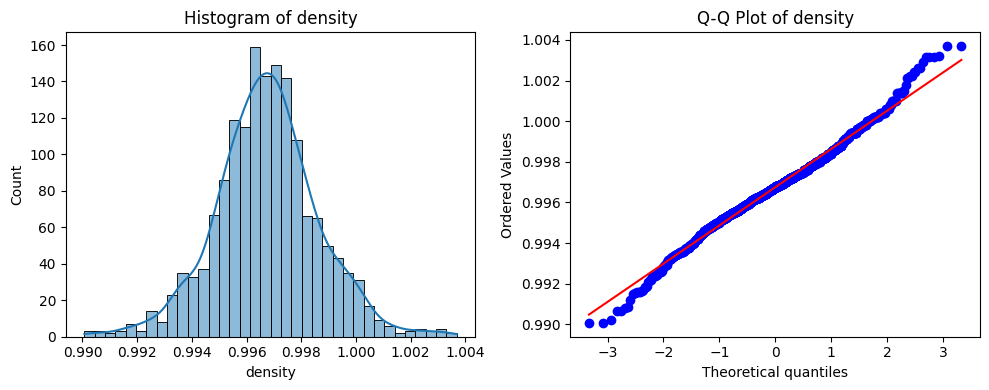

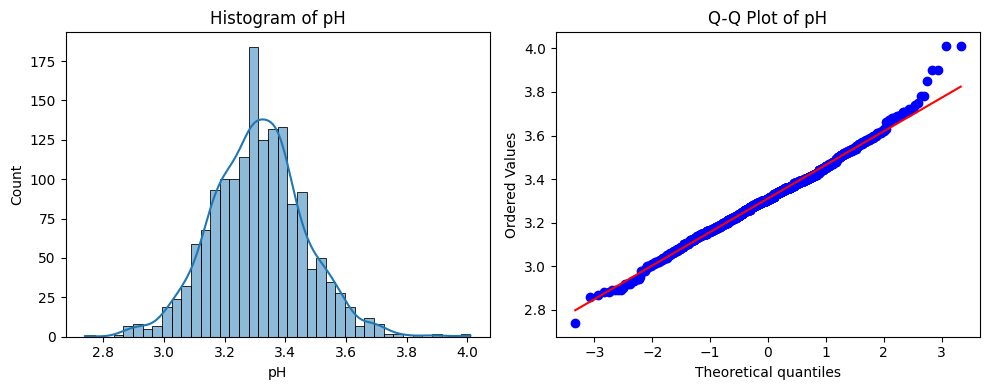

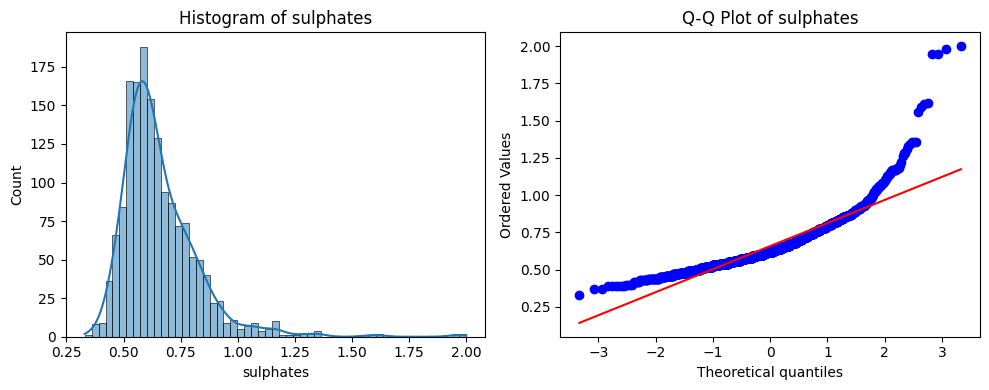

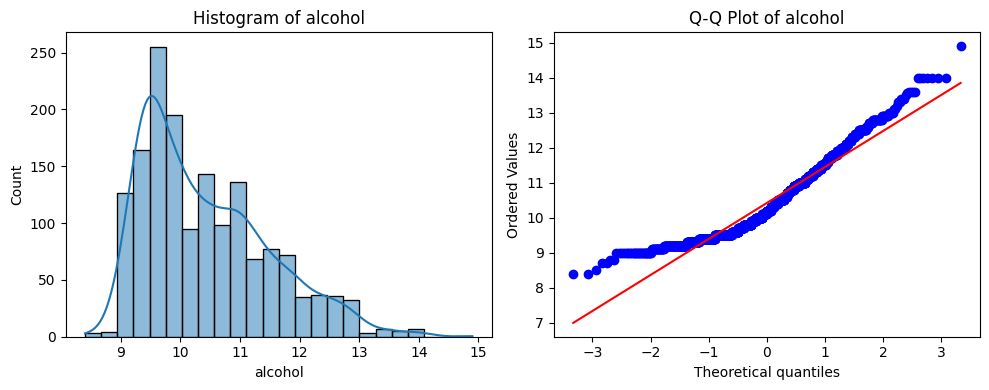

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histogram & QQ plot for each variable
for col in df.columns:
    if col != "quality":
        fig, ax = plt.subplots(1, 2, figsize=(10,4))

        # Histogram
        sns.histplot(df[col], kde=True, ax=ax[0])
        ax[0].set_title(f"Histogram of {col}")

        # QQ plot
        stats.probplot(df[col], dist="norm", plot=ax[1])
        ax[1].set_title(f"Q-Q Plot of {col}")

        plt.tight_layout()
        plt.show()

In [ ]:
# Shapiro-Wilk test for normality
for col in df.columns:
    stat, p = shapiro(df[col])
    print(f"{col}: p-value = {p}")

fixed acidity: p-value = 1.525011710791387e-24
volatile acidity: p-value = 2.692934735712727e-16
citric acid: p-value = 1.0219317829705018e-21
residual sugar: p-value = 1.0201616453237868e-52
chlorides: p-value = 1.1790556953147118e-55
free sulfur dioxide: p-value = 7.694596687816645e-31
total sulfur dioxide: p-value = 3.5734514102654424e-34
density: p-value = 1.936052131352189e-08
pH: p-value = 1.7122367757609613e-06
sulphates: p-value = 5.823139712583187e-38
alcohol: p-value = 6.644056905730039e-27
quality: p-value = 9.515084999430088e-36


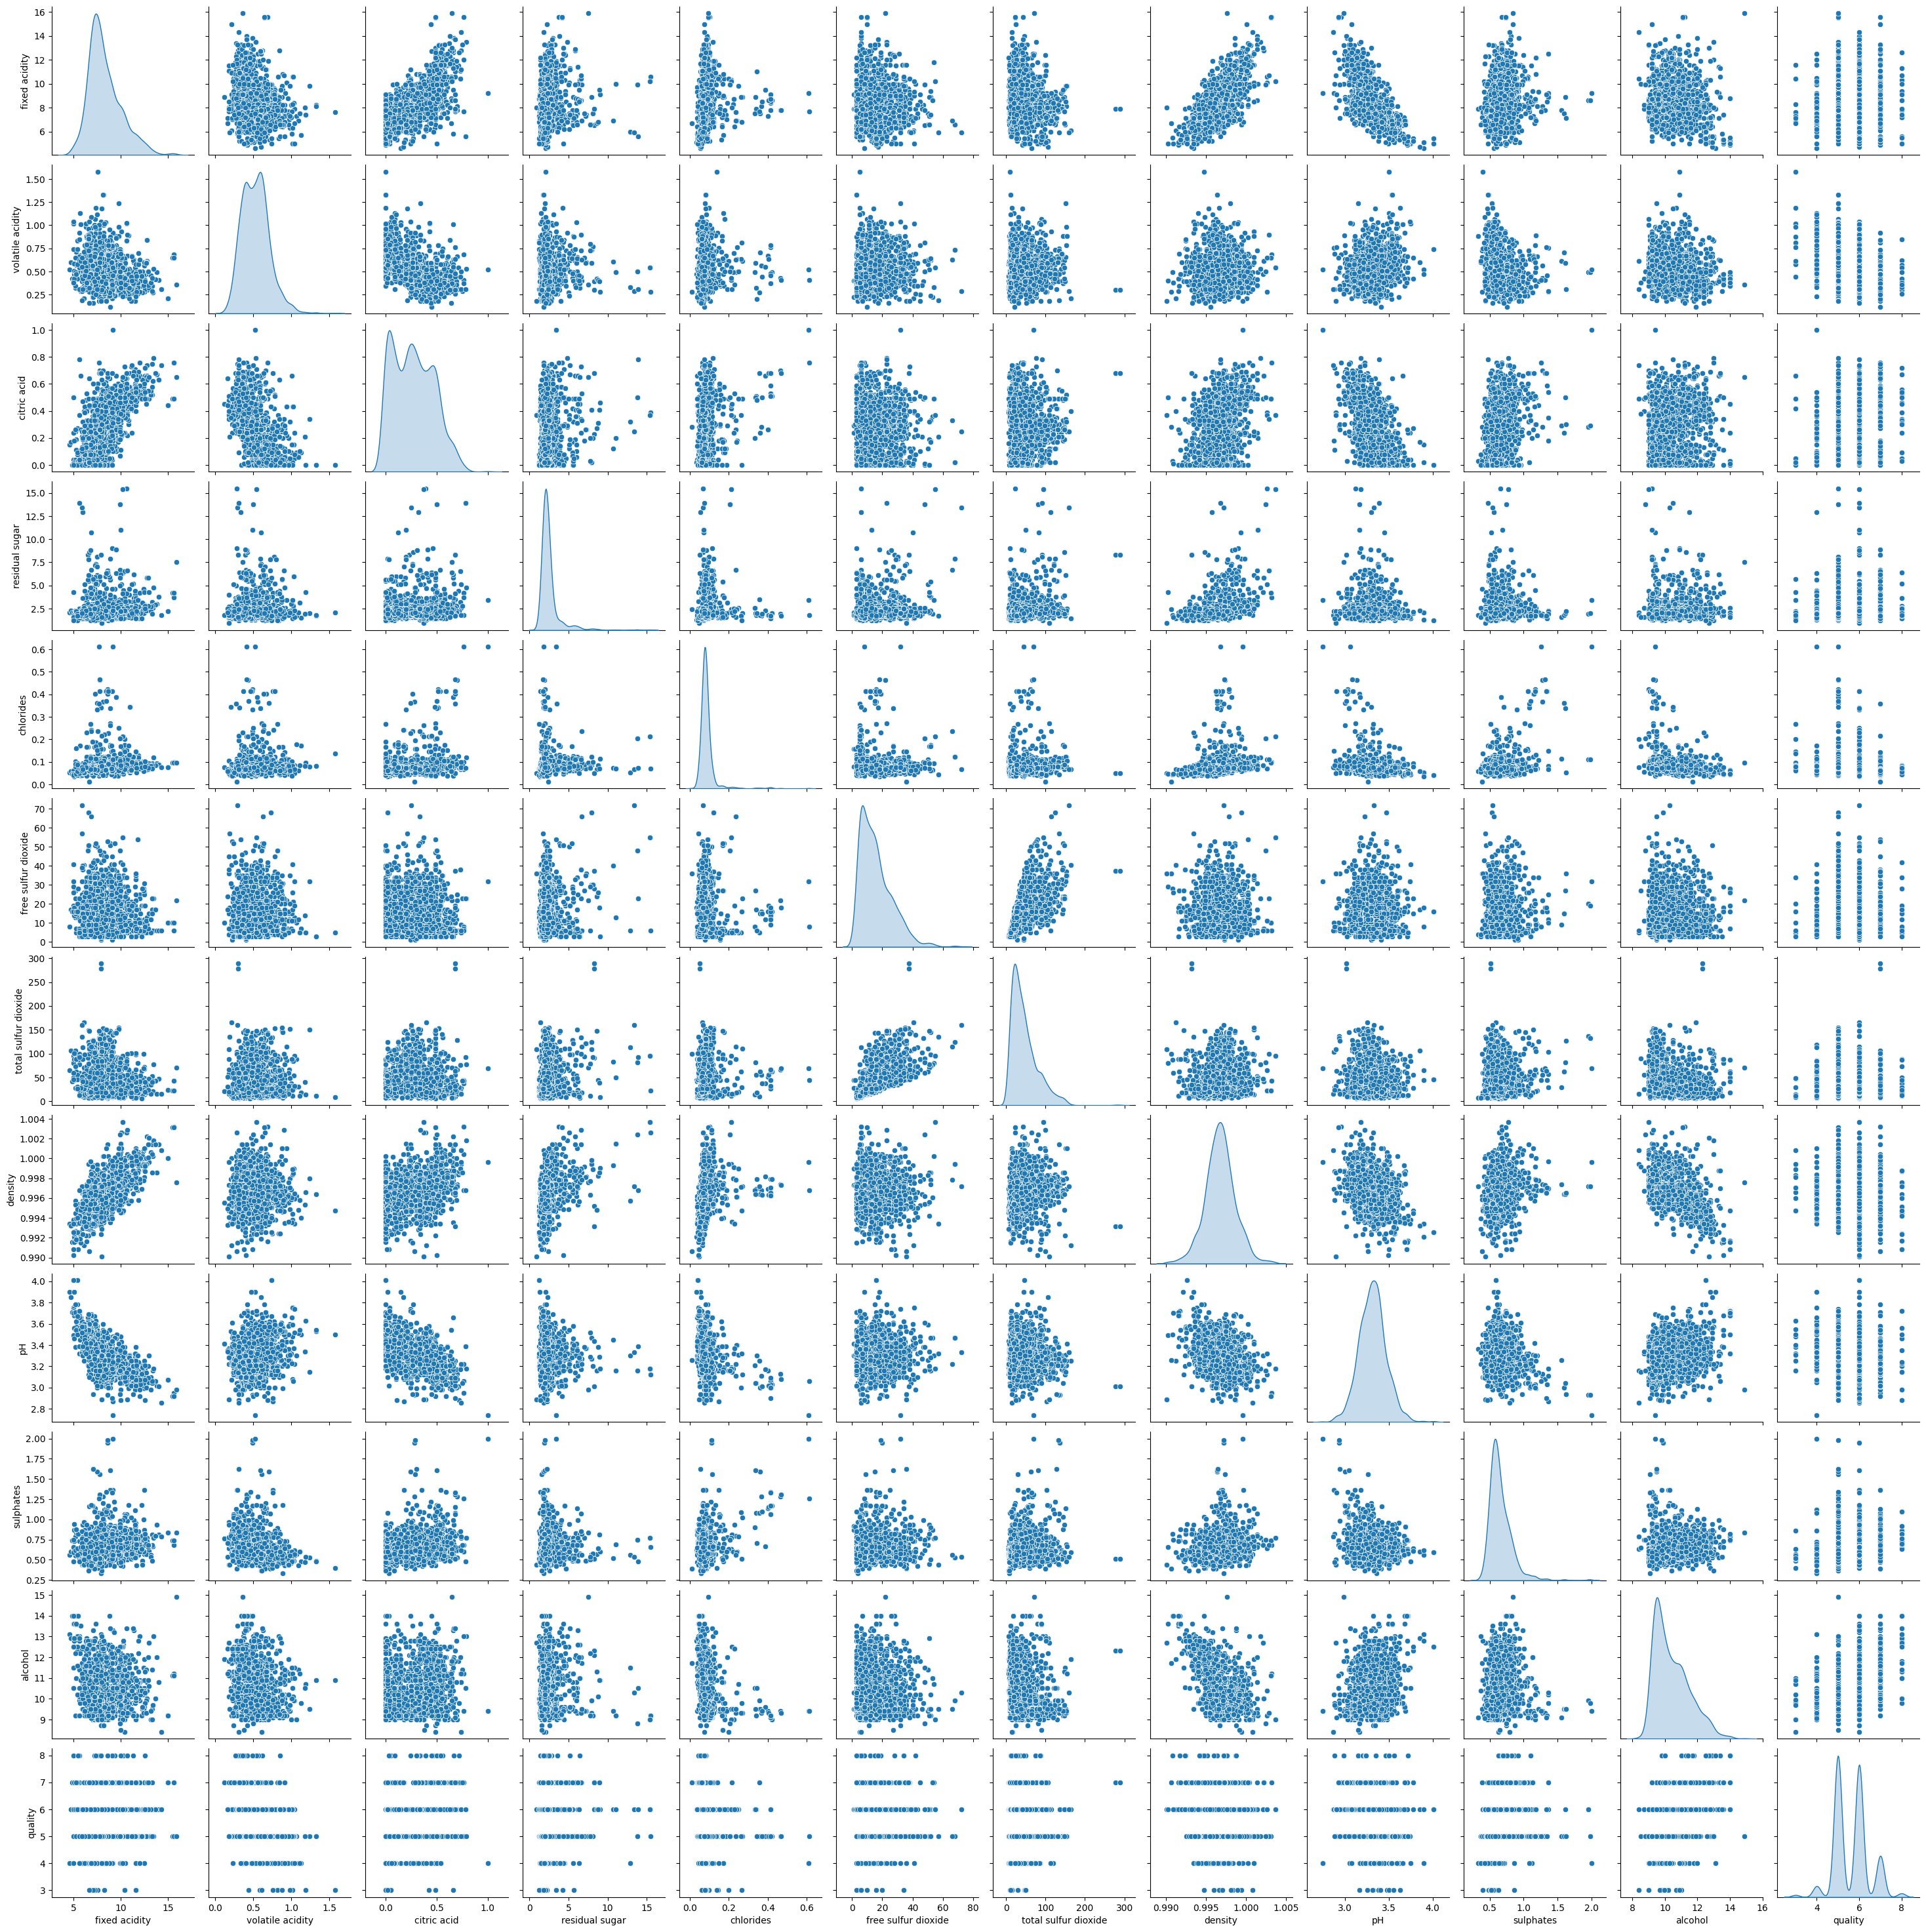

In [ ]:
sns.pairplot(df, diag_kind="kde")
plt.show()

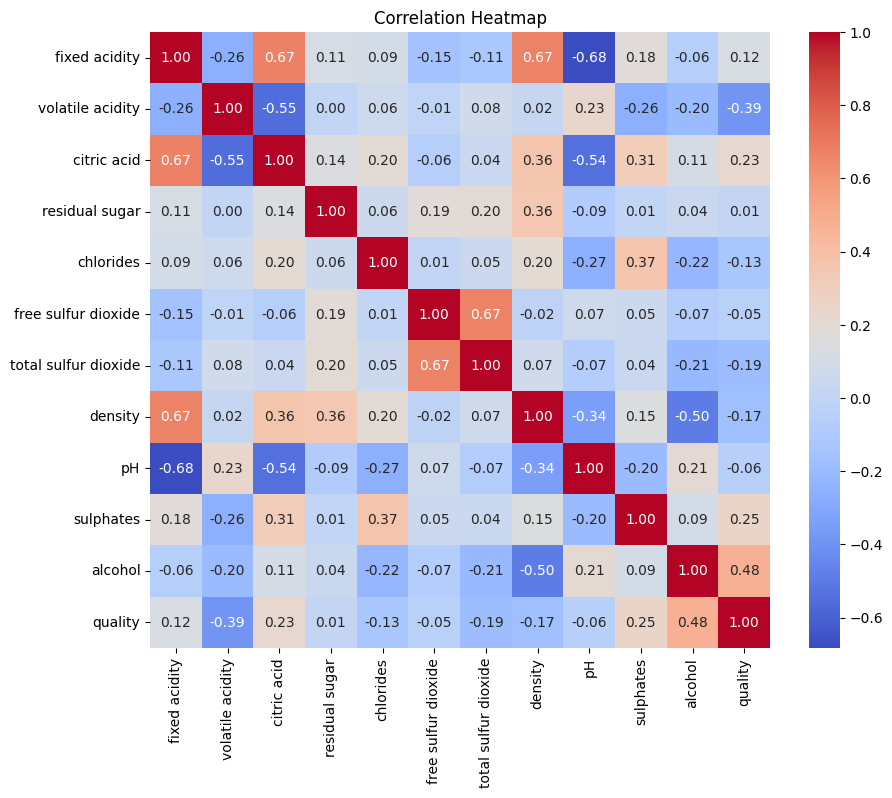

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

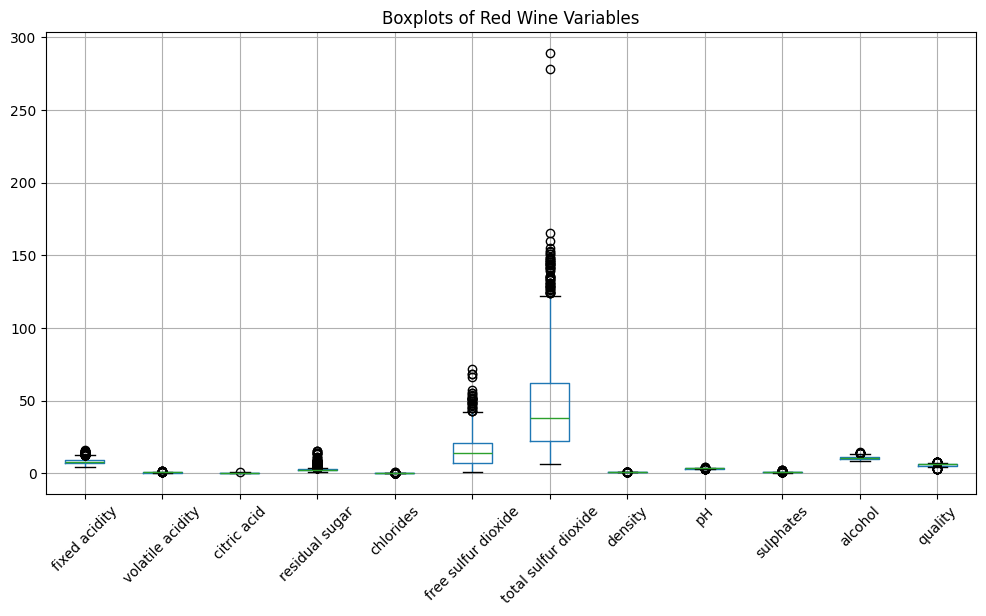

In [ ]:
plt.figure(figsize=(12,6))
df.boxplot(rot=45)
plt.title("Boxplots of Red Wine Variables")
plt.show()

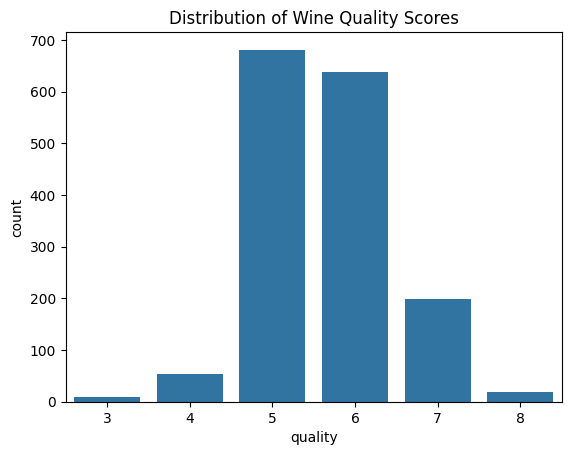

In [ ]:
sns.countplot(x="quality", data=df)
plt.title("Distribution of Wine Quality Scores")
plt.show()

In [ ]:
z_scores = np.abs(zscore(df))
outliers = (z_scores > 3).sum()
print("Number of outliers in each column:\n", outliers)

Number of outliers in each column:
 192


In [ ]:
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print("Original size:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

Original size: (1599, 12)
After removing outliers: (1451, 12)


In [ ]:
quality_corr = df.corr()["quality"].sort_values(ascending=False)
print("Correlation with Quality:\n", quality_corr)

Correlation with Quality:
 quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


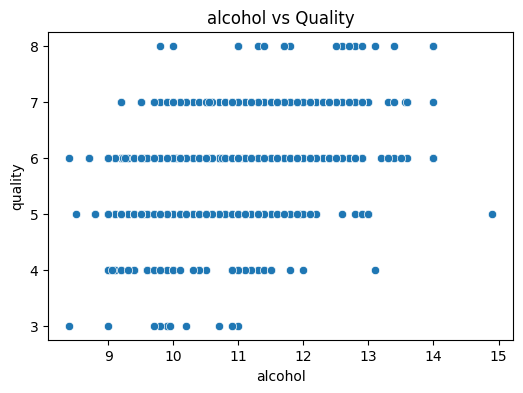

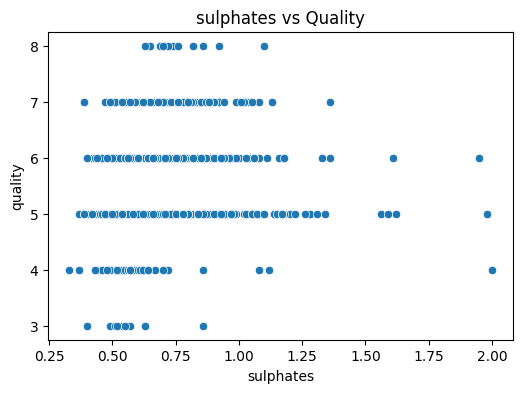

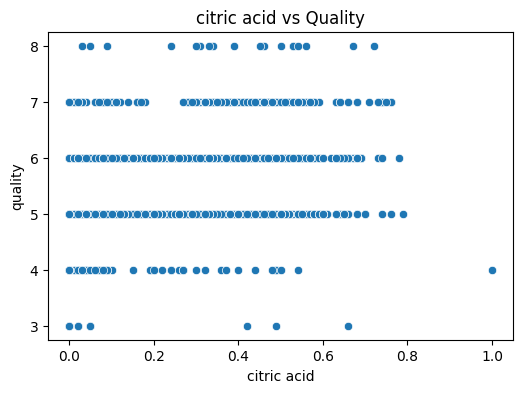

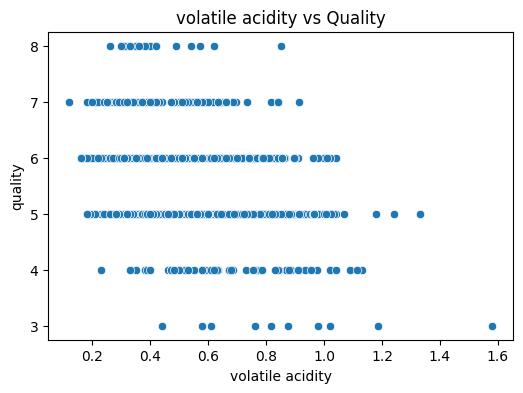

In [ ]:
important_features = ["alcohol", "sulphates", "citric acid", "volatile acidity"]

for col in important_features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=df, x=col, y="quality")
    plt.title(f"{col} vs Quality")
    plt.show()